In [ ]:
!nvcc --version
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

execution1 DIM **1000**

In [91]:
%%cu 
#include<stdio.h>
#define DIM 1000
struct cuComplex{
    float r;
    float i;
    __device__ cuComplex(float a, float b):r(a),i(b){}
    __device__ float magnitude2(void){ return r*r+i*i; }
    __device__ cuComplex operator*(const cuComplex &a){ return cuComplex(r*a.r-i*a.i,i*a.r+r*a.i); }
    __device__ cuComplex operator+(const cuComplex &a){ return cuComplex(r+a.r,i+a.i); }
};
__device__ int julia(int x, int y){
    const float scale=1.5;
    float jx=scale*(float)(DIM/2-x)/(DIM/2);
    float jy=scale*(float)(DIM/2-y)/(DIM/2);
    cuComplex c(-0.8,0.156);
    cuComplex a(jx,jy);
    int i=0;
    for(i=0;i<200;i++){
        a=a*a+c;
        if(a.magnitude2()>1000) return 0;
    }
    return 1;
}
__global__ void kernel(unsigned char *ptr){
    int x=blockIdx.x;
    int y=blockIdx.y;
    int offset=x+y*gridDim.x;

    int juliaValue=julia(x,y);
    ptr[offset*4+0]=255*juliaValue;
    ptr[offset*4+1]=0;
    ptr[offset*4+2]=0;
    ptr[offset*4+3]=255;
}
struct DataBlock{
    unsigned char *dev_bitmap;
};

void wypisz_RGB_fraktal(unsigned char *ptr){
    for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            printf("\n%d, %d, %d, %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2], ptr[offset*4+3]);
        }
    }
}
void save_to_file(unsigned char *ptr){
    FILE *fp=fopen("Fraktal_GPU.jpg","w");
    fprintf(fp,"P3\n%d %d\n255\n", DIM, DIM);
     for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            fprintf(fp,"\n%d %d %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2]);
        }
}
fclose(fp);
}
int main(void){
    clock_t start, end;
    double execution_time1;
    FILE *fp = fopen("execution_time1.txt", "w");
    for (int i = 0; i < 10; i++) {
        start = clock();
        DataBlock data;
        unsigned char *bitmap = (unsigned char*)malloc(DIM*DIM*4*sizeof(unsigned char));
        int image_size = DIM*DIM*4;
        unsigned char *dev_bitmap;
        cudaMalloc((void**)&dev_bitmap, image_size);
        data.dev_bitmap=dev_bitmap;
        dim3 grid(DIM,DIM);
        kernel<<<grid,1>>>(dev_bitmap);
        cudaMemcpy(bitmap,dev_bitmap,image_size,cudaMemcpyDeviceToHost);
        cudaFree(dev_bitmap);
        save_to_file (bitmap);
        end = clock();
            execution_time1 = ((double)(end - start))/CLOCKS_PER_SEC;
            fprintf(fp, "%f\n", execution_time1);
        }
        fclose(fp);
        return 0;
}


execution1_1 DIM **500**

In [95]:
%%cu 
#include<stdio.h>
#define DIM 500
struct cuComplex{
    float r;
    float i;
    __device__ cuComplex(float a, float b):r(a),i(b){}
    __device__ float magnitude2(void){ return r*r+i*i; }
    __device__ cuComplex operator*(const cuComplex &a){ return cuComplex(r*a.r-i*a.i,i*a.r+r*a.i); }
    __device__ cuComplex operator+(const cuComplex &a){ return cuComplex(r+a.r,i+a.i); }
};
__device__ int julia(int x, int y){
    const float scale=1.5;
    float jx=scale*(float)(DIM/2-x)/(DIM/2);
    float jy=scale*(float)(DIM/2-y)/(DIM/2);
    cuComplex c(-0.8,0.156);
    cuComplex a(jx,jy);
    int i=0;
    for(i=0;i<200;i++){
        a=a*a+c;
        if(a.magnitude2()>1000) return 0;
    }
    return 1;
}
__global__ void kernel(unsigned char *ptr){
    int x=blockIdx.x;
    int y=blockIdx.y;
    int offset=x+y*gridDim.x;

    int juliaValue=julia(x,y);
    ptr[offset*4+0]=255*juliaValue;
    ptr[offset*4+1]=0;
    ptr[offset*4+2]=0;
    ptr[offset*4+3]=255;
}
struct DataBlock{
    unsigned char *dev_bitmap;
};

void wypisz_RGB_fraktal(unsigned char *ptr){
    for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            printf("\n%d, %d, %d, %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2], ptr[offset*4+3]);
        }
    }
}
void save_to_file(unsigned char *ptr){
    FILE *fp=fopen("Fraktal_GPU.jpg","w");
    fprintf(fp,"P3\n%d %d\n255\n", DIM, DIM);
     for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            fprintf(fp,"\n%d %d %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2]);
        }
}
fclose(fp);
}
int main(void){
    clock_t start, end;
    double execution_time1_1;
    FILE *fp = fopen("execution_time1_1.txt", "w");
    for (int i = 0; i < 10; i++) {
        start = clock();
        DataBlock data;
        unsigned char *bitmap = (unsigned char*)malloc(DIM*DIM*4*sizeof(unsigned char));
        int image_size = DIM*DIM*4;
        unsigned char *dev_bitmap;
        cudaMalloc((void**)&dev_bitmap, image_size);
        data.dev_bitmap=dev_bitmap;
        dim3 grid(DIM,DIM);
        kernel<<<grid,1>>>(dev_bitmap);
        cudaMemcpy(bitmap,dev_bitmap,image_size,cudaMemcpyDeviceToHost);
        cudaFree(dev_bitmap);
        save_to_file (bitmap);
        end = clock();
            execution_time1_1 = ((double)(end - start))/CLOCKS_PER_SEC;
            fprintf(fp, "%f\n", execution_time1_1);
        }
        fclose(fp);
        return 0;
}


execution2 DIM **1000**

In [ ]:
%%cu 
#include<stdio.h>
#define DIM 1000

struct cuComplex{
    float r;
    float i;
    cuComplex(float a, float b):r(a),i(b){}
    float magnitude2(void){return r*r+i*i;}
    cuComplex operator*(const cuComplex &a){ return cuComplex(r*a.r-i*a.i,i*a.r+r*a.i); }
    cuComplex operator+(const cuComplex &a){ return cuComplex(r+a.r,i+a.i); }
};
    int julia(int x, int y){
    const float scale=1.5;
    float jx=scale*(float)(DIM/2-x)/(DIM/2);
    float jy=scale*(float)(DIM/2-y)/(DIM/2);
    cuComplex c(-0.8,0.156);
    cuComplex a(jx,jy);
    int i=0;
    for(i=0;i<200;i++){
        a=a*a+c;
        if(a.magnitude2()>1000) return 0;
    }
    return 1;
}
    void kernel(unsigned char *ptr){
        for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            int juliaValue=julia(x,y);
            ptr[offset*4+0]=255*juliaValue;
            ptr[offset*4+1]=0;
            ptr[offset*4+2]=0;
            ptr[offset*4+3]=255;
          }
        }
    }
  
struct DataBlock{
    unsigned char *dev_bitmap;
};

void wypisz_RGB_fraktal(unsigned char *ptr){
    for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            printf("\n%d, %d, %d, %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2], ptr[offset*4+3]);
        }
    }
}
void save_to_file(unsigned char *ptr){
    FILE *fp=fopen("Fraktal_CPU.jpg","w");
    fprintf(fp,"P3\n%d %d\n255\n", DIM, DIM);
     for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            fprintf(fp,"\n%d %d %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2]);
        }
}
fclose(fp);
}
int main(void){
    clock_t start, end;
    double execution_time2;
    FILE *fp = fopen("execution_time2.txt", "w");
    for (int i = 0; i < 10; i++) {
        start = clock();
        DataBlock data;
        unsigned char *bitmap = (unsigned char*)malloc(DIM*DIM*4*sizeof(unsigned char));
        int image_size = DIM*DIM*4;
        kernel(bitmap);
        save_to_file (bitmap);
        end = clock();
        execution_time2 = ((double)(end - start))/CLOCKS_PER_SEC;
        fprintf(fp, "%f\n", execution_time2);
    }
    fclose(fp);
    return 0;
}

execution2_2 DIM **500**

In [96]:
%%cu 
#include<stdio.h>
#define DIM 500

struct cuComplex{
    float r;
    float i;
    cuComplex(float a, float b):r(a),i(b){}
    float magnitude2(void){return r*r+i*i;}
    cuComplex operator*(const cuComplex &a){ return cuComplex(r*a.r-i*a.i,i*a.r+r*a.i); }
    cuComplex operator+(const cuComplex &a){ return cuComplex(r+a.r,i+a.i); }
};
    int julia(int x, int y){
    const float scale=1.5;
    float jx=scale*(float)(DIM/2-x)/(DIM/2);
    float jy=scale*(float)(DIM/2-y)/(DIM/2);
    cuComplex c(-0.8,0.156);
    cuComplex a(jx,jy);
    int i=0;
    for(i=0;i<200;i++){
        a=a*a+c;
        if(a.magnitude2()>1000) return 0;
    }
    return 1;
}
    void kernel(unsigned char *ptr){
        for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            int juliaValue=julia(x,y);
            ptr[offset*4+0]=255*juliaValue;
            ptr[offset*4+1]=0;
            ptr[offset*4+2]=0;
            ptr[offset*4+3]=255;
          }
        }
    }
  
struct DataBlock{
    unsigned char *dev_bitmap;
};

void wypisz_RGB_fraktal(unsigned char *ptr){
    for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            printf("\n%d, %d, %d, %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2], ptr[offset*4+3]);
        }
    }
}
void save_to_file(unsigned char *ptr){
    FILE *fp=fopen("Fraktal_CPU.jpg","w");
    fprintf(fp,"P3\n%d %d\n255\n", DIM, DIM);
     for(int y=0;y<DIM;y++){
        for(int x=0;x<DIM;x++){
            int offset=x+y*DIM;
            fprintf(fp,"\n%d %d %d", ptr[offset*4+0], ptr[offset*4+1], ptr[offset*4+2]);
        }
}
fclose(fp);
}
int main(void){
    clock_t start, end;
    double execution_time2_2;
    FILE *fp = fopen("execution_time2_2.txt", "w");
    for (int i = 0; i < 10; i++) {
        start = clock();
        DataBlock data;
        unsigned char *bitmap = (unsigned char*)malloc(DIM*DIM*4*sizeof(unsigned char));
        int image_size = DIM*DIM*4;
        kernel(bitmap);
        save_to_file (bitmap);
        end = clock();
        execution_time2_2 = ((double)(end - start))/CLOCKS_PER_SEC;
        fprintf(fp, "%f\n", execution_time2_2);
    }
    fclose(fp);
    return 0;
}

In [ ]:
!apt-get install gnuplot
!pip install matplotlib

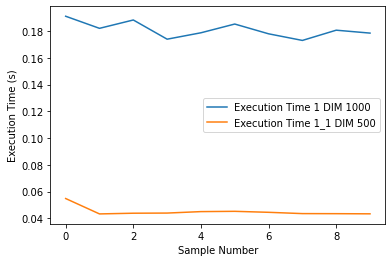

In [97]:
import matplotlib.pyplot as plt

# Read data from files
execution_time1 = []
with open("execution_time1.txt", "r") as file:
    for line in file:
        execution_time1.append(float(line.strip()))

execution_time2 = []
with open("execution_time1_1.txt", "r") as file:
    for line in file:
        execution_time2.append(float(line.strip()))

# Create a line plot
plt.plot(execution_time1, label="Execution Time 1 DIM 1000")
plt.plot(execution_time2, label="Execution Time 1_1 DIM 500")
plt.xlabel("Sample Number")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show()


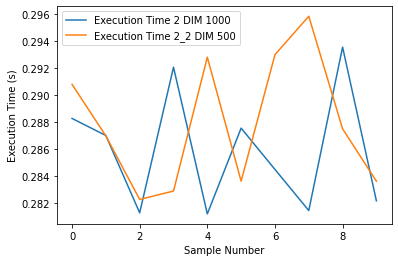

In [98]:
import matplotlib.pyplot as plt

# Read data from files
execution_time1 = []
with open("execution_time2.txt", "r") as file:
    for line in file:
        execution_time1.append(float(line.strip()))

execution_time2 = []
with open("execution_time2_2.txt", "r") as file:
    for line in file:
        execution_time2.append(float(line.strip()))

# Create a line plot
plt.plot(execution_time1, label="Execution Time 2 DIM 1000")
plt.plot(execution_time2, label="Execution Time 2_2 DIM 500")
plt.xlabel("Sample Number")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show()
